In [1]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo CSV
file_path = '../googleplaystore.csv'  
google_play_data = pd.read_csv(file_path)

# Remover linhas duplicadas
google_play_data_cleaned = google_play_data.drop_duplicates()

# Verificar a quantidade de linhas antes e depois da limpeza
print(f"Linhas antes da remoção: {google_play_data.shape[0]}")
print(f"Linhas após a remoção: {google_play_data_cleaned.shape[0]}")


Linhas antes da remoção: 10841
Linhas após a remoção: 10358


# Parte 1 ja esta feita

In [2]:
# Carregar o arquivo CSV
google_play_data = pd.read_csv('../googleplaystore.csv')

# Visualizar as primeiras linhas do dataframe
google_play_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Fazendo a parte 2

In [3]:
# Recarregar os dados para garantir que a variável esteja definida
import pandas as pd

# Carregar o arquivo CSV
file_path = '../googleplaystore.csv'
google_play_data = pd.read_csv(file_path)

# Remover valores inválidos como 'Free' e '0+'
google_play_data_cleaned = google_play_data[~google_play_data['Installs'].isin(['Free', '0+'])]

# Remover símbolos e converter a coluna 'Installs' para numérico
google_play_data_cleaned['Installs'] = google_play_data_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Selecionar os top 5 aplicativos por número de instalações
top_5_apps = google_play_data_cleaned.sort_values(by='Installs', ascending=False).head(5)

# Exibir os top 5 aplicativos sem gerar gráfico
top_5_apps[['App', 'Installs']]


C:\Users\User\AppData\Local\Temp\ipykernel_18332\2797226009.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_play_data_cleaned['Installs'] = google_play_data_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(int)


,App,Installs
3665,YouTube,1000000000
4104,Messenger – Text and Video Chat for Free,1000000000
3896,Subway Surfers,1000000000
3996,Google Chrome: Fast & Secure,1000000000
3909,Instagram,1000000000


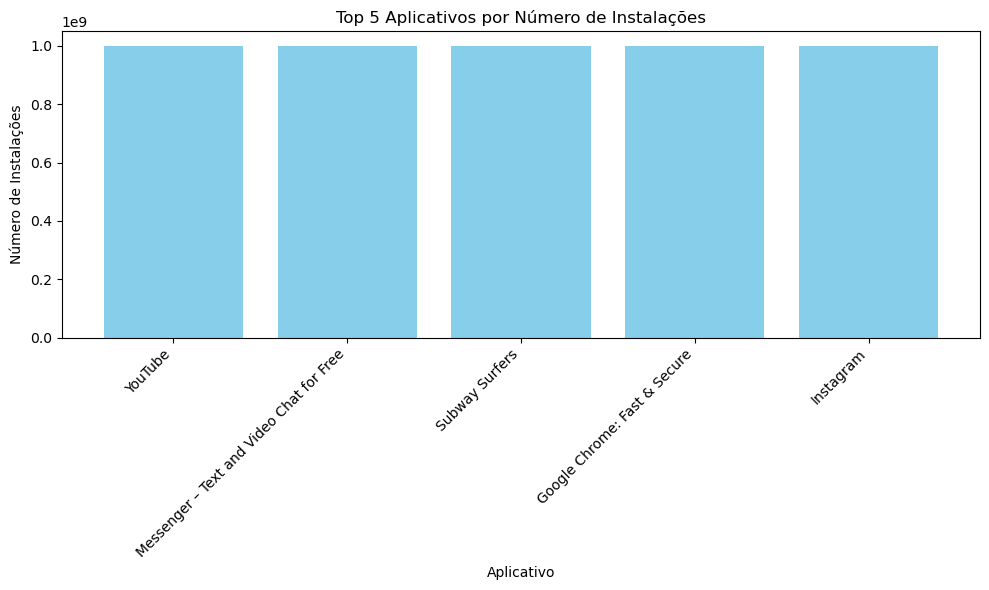

In [4]:

# Remover valores inválidos como 'Free' e '0+'
google_play_data_cleaned = google_play_data[~google_play_data['Installs'].isin(['Free', '0+'])]

# Remover símbolos e converter a coluna 'Installs' para numérico]
# Remover símbolos e converter a coluna 'Installs' para numérico usando .loc[]
google_play_data_cleaned.loc[:, 'Installs'] = google_play_data_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(int)


# Selecionar os top 5 aplicativos por número de instalações
top_5_apps = google_play_data_cleaned.sort_values(by='Installs', ascending=False).head(5)

# Criar o gráfico de barras verticais
plt.figure(figsize=(10,6))
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')
plt.title('Top 5 Aplicativos por Número de Instalações')
plt.xlabel('Aplicativo')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos para facilitar a leitura
#plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o maior valor no topo
plt.tight_layout()
plt.show()


# Parte 3 fazendo o grafico pizza

In [5]:
category_counts = google_play_data['Category'].value_counts().drop_duplicates
print(category_counts)

<bound method Series.drop_duplicates of Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1

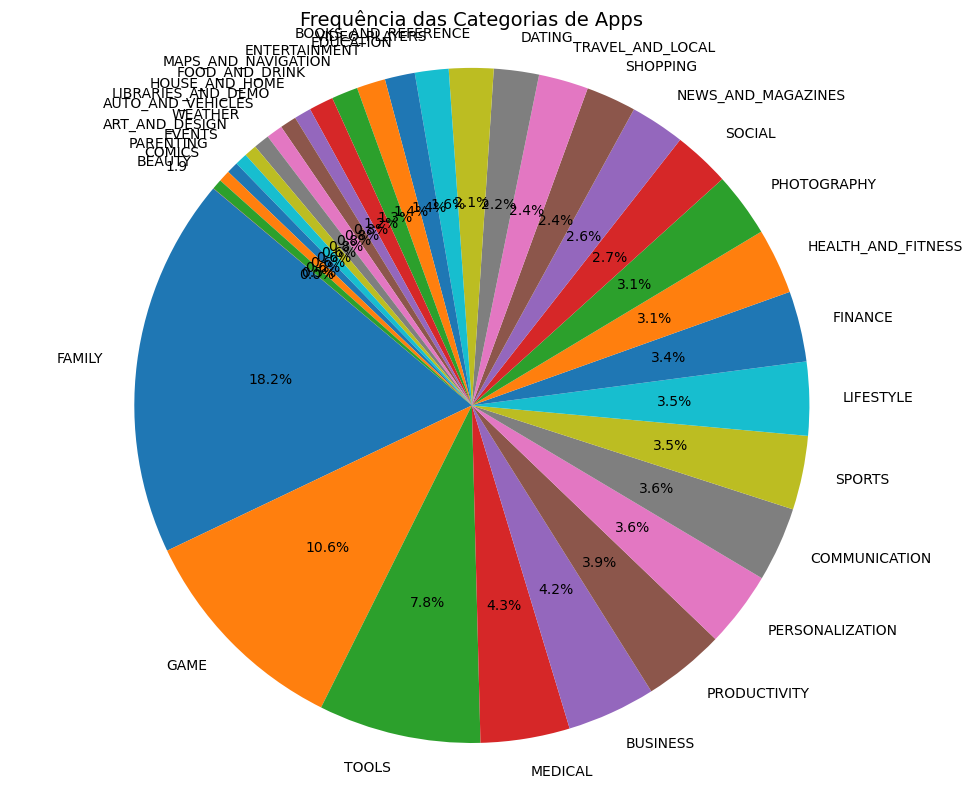

In [5]:
# Contar a frequência de cada categoria no dataset
category_counts = google_play_data['Category'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequência das Categorias de Apps', fontsize=14)
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.tight_layout()

# Exibir o gráfico
plt.show()


# Ficou feio vamos arrumar 

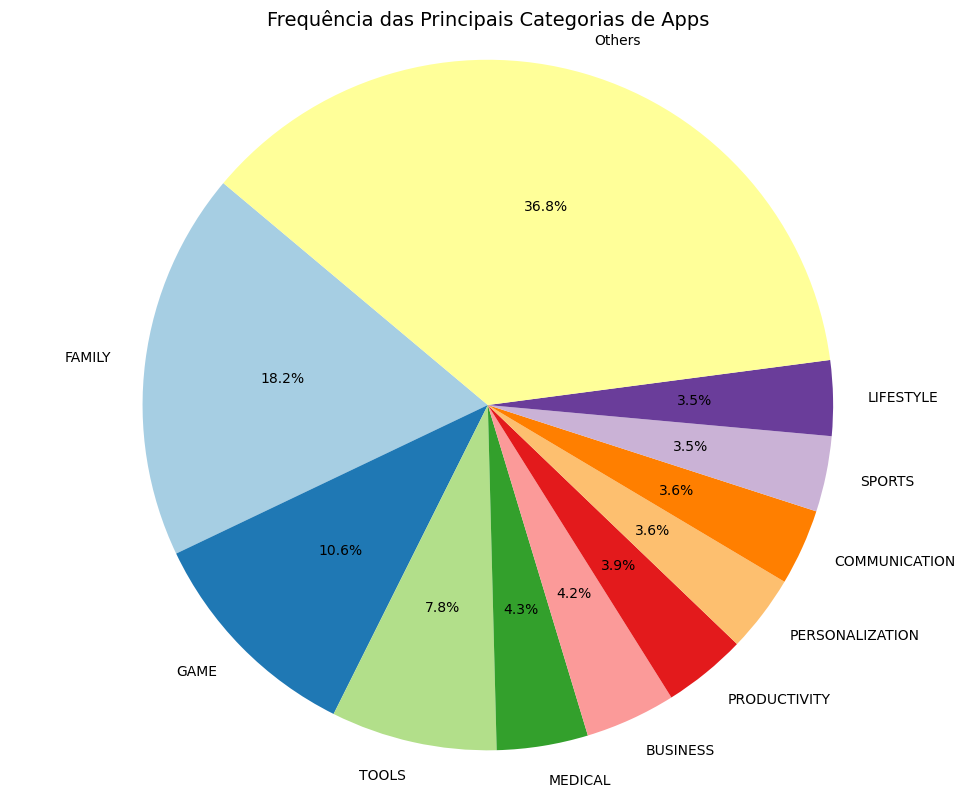

In [6]:
# Contar a frequência de cada categoria no dataset
category_counts = google_play_data['Category'].value_counts()

# Definir o número de categorias mais relevantes (as maiores fatias)
num_categories_to_display = 10  # Por exemplo, as 10 categorias mais frequentes
other_categories_count = category_counts[num_categories_to_display:].sum()

# Criar um novo dataframe para as categorias principais + "Outros"
categories_to_display = category_counts[:num_categories_to_display]
categories_to_display['Others'] = other_categories_count

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(categories_to_display, labels=categories_to_display.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors, textprops={'fontsize': 10})

plt.title('Frequência das Principais Categorias de Apps', fontsize=14)
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.tight_layout()

# Exibir o gráfico
plt.show()


# PARTE 4

In [7]:
# Substituir strings inválidas por NaN para evitar problemas na conversão
google_play_data['Price'] = google_play_data['Price'].replace('[\$,]', '', regex=True)

# Filtrar apenas as linhas onde o 'Price' pode ser convertido em número
google_play_data['Price'] = pd.to_numeric(google_play_data['Price'], errors='coerce')

# Verificar os preços únicos no dataset e suas frequências
precos_unicos = google_play_data['Price'].value_counts()

# Exibir os preços únicos e quantos apps têm cada preço
print("Frequência dos preços únicos no dataset:")
print(precos_unicos)

# Verificar se há algum app com preço maior que zero
apps_pagos = google_play_data[google_play_data['Price'] > 0]

# Exibir apps pagos, se houver
if not apps_pagos.empty:
    print("Apps pagos encontrados:")
    print(apps_pagos[['App', 'Price']])
else:
    print("Todos os apps têm preço zero.")


Frequência dos preços únicos no dataset:
Price
0.00     10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64
Apps pagos encontrados:
                                                 App  Price
234    TurboScan: scan documents and receipts in PDF   4.99
235                   Tiny Scanner Pro: PDF Doc Scan   4.99
290    TurboScan: scan documents and receipts in PDF   4.99
291                   Tiny Scanner Pro: PDF Doc Scan   4.99
427                               Puffin Browser Pro   3.99
...                                              ...    ...
10735                                    FP VoiceBot   0.99
10760                                Fast Tract Diet   7.99
10782                        Trine 2: Complete Story  16.99
10785                                   sugar, sugar   1.20
10798                           Word Search Tab 1 FR   1.04

[800 

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_18332\2557987444.py:2: SyntaxWarning: invalid escape sequence '\$'
  google_play_data['Price'] = google_play_data['Price'].replace('[\$,]', '', regex=True)


In [8]:
# Limpar e converter a coluna 'Price' para numérico, removendo o símbolo '$'
google_play_data_cleaned['Price'] = google_play_data_cleaned['Price'].str.replace('$', '').astype(float)

# Encontrar o app mais caro
app_mais_caro = google_play_data_cleaned.sort_values(by='Price', ascending=False).head(1)

# Exibir o app mais caro
app_mais_caro[['App', 'Price']]


C:\Users\User\AppData\Local\Temp\ipykernel_18332\1608177870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_play_data_cleaned['Price'] = google_play_data_cleaned['Price'].str.replace('$', '').astype(float)


,App,Price
4367,I'm Rich - Trump Edition,400.0


In [9]:
# Converter a coluna 'Price' para string para evitar o erro
google_play_data['Price'] = google_play_data['Price'].astype(str)

# Filtrar apenas os valores que começam com '$'
google_play_data = google_play_data[google_play_data['Price'].str.startswith('$')]

# Remover o símbolo de dólar e converter a coluna para numérico
google_play_data['Price'] = google_play_data['Price'].str.replace('$', '').astype(float)

# Encontrar o app mais caro
app_mais_caro = google_play_data[['App', 'Price']].sort_values(by='Price', ascending=False).head(1)

# Exibir o app mais caro
print("O app mais caro é:")
print(app_mais_caro)


O app mais caro é:
Empty DataFrame
Columns: [App, Price]
Index: []


# Parte 5 agora 

In [10]:

# Contar o número de apps classificados como 'Mature 17+' na coluna 'Content Rating'
mature_17_apps_count = google_play_data_cleaned[google_play_data_cleaned['Content Rating'] == 'Mature 17+'].shape[0]

# Exibir o resultado
mature_17_apps_count

print(f"Quantidade de apps classificados como 'Mature 17+': {mature_17_apps_count}")


Quantidade de apps classificados como 'Mature 17+': 499


# fazendo remoção

In [11]:
# Remover duplicatas com base no nome do aplicativo, mantendo a primeira ocorrência
mature_17_unique_apps = google_play_data_cleaned[google_play_data_cleaned['Content Rating'] == 'Mature 17+'].drop_duplicates(subset='App')

# Contar o número de apps únicos classificados como 'Mature 17+'
mature_17_apps_unique_count = mature_17_unique_apps.shape[0]

# Exibir o resultado


print(f"Quantidade de apps classificados como 'Mature 17+': {mature_17_apps_unique_count}")


Quantidade de apps classificados como 'Mature 17+': 393


In [12]:
# Encontrar os apps duplicados (com base no nome do app)
duplicated_apps = google_play_data_cleaned[google_play_data_cleaned.duplicated(subset='App', keep=False)]

# Exibir as primeiras 10 duplicatas para mostrar o que foi removido
duplicated_apps.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
145,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,4.5,454060,Varies with device,10000000,Free,0.0,Everyone,Books & Reference,"May 18, 2018",Varies with device,Varies with device
146,NOOK: Read eBooks & Magazines,BOOKS_AND_REFERENCE,4.5,155446,Varies with device,10000000,Free,0.0,Teen,Books & Reference,"April 25, 2018",Varies with device,Varies with device
155,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,4.1,363934,7.1M,10000000,Free,0.0,Everyone,Books & Reference,"July 11, 2018",9.1.363,4.1 and up
157,Spanish English Translator,BOOKS_AND_REFERENCE,4.2,87873,Varies with device,10000000,Free,0.0,Teen,Books & Reference,"May 28, 2018",Varies with device,Varies with device


# PARTE 6

In [13]:
# Converter a coluna 'Reviews' para numérico (caso necessário)
google_play_data_cleaned['Reviews'] = pd.to_numeric(google_play_data_cleaned['Reviews'], errors='coerce')

# Selecionar os top 10 aplicativos por número de reviews
top_10_reviews = google_play_data_cleaned[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Exibir o resultado
top_10_reviews


,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
381,WhatsApp Messenger,69119316
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
2611,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578


In [14]:
# Remover duplicatas com base no nome do aplicativo, mantendo a primeira ocorrência
# mas selecionar os top 10 únicos
top_10_reviews_unique = google_play_data_cleaned[['App', 'Reviews']].drop_duplicates(subset='App', keep='first').sort_values(by='Reviews', ascending=False).head(10)

# Exibir o resultado sem duplicatas
top_10_reviews_unique

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


In [17]:
print("Top 10 apps por número de reviews (apps únicos):")
print(top_10_reviews_unique)




Top 10 apps por número de reviews (apps únicos):
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


# PARTE 7

In [18]:
# 1. Lista de categorias com mais instalações (somando as instalações de todos os apps por categoria)
category_installs = google_play_data_cleaned.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# 2. Média de classificações (ratings) de todos os apps
media_ratings = google_play_data_cleaned['Rating'].mean()

category_installs, media_ratings


(Category
 GAME                  35086024415
 COMMUNICATION         32647276251
 PRODUCTIVITY          14176091369
 SOCIAL                14069867902
 TOOLS                 11452771915
 FAMILY                10258263505
 PHOTOGRAPHY           10088247655
 NEWS_AND_MAGAZINES     7496317760
 TRAVEL_AND_LOCAL       6868887146
 VIDEO_PLAYERS          6222002720
 Name: Installs, dtype: object,
 4.191757420456972)

In [18]:
print(f"Top 10 categorias por número de instalações (em formato de lista): {top_10_reviews_unique}")

print(f"Média de classificações (ratings) de todos os apps (em formato de valor): {media_ratings}")

Top 10 categorias por número de instalações (em formato de lista):                                                     App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508
Média de classificações (ratings) de todos os apps (em formato de valor): 4.191757420456972


# PARTE 8

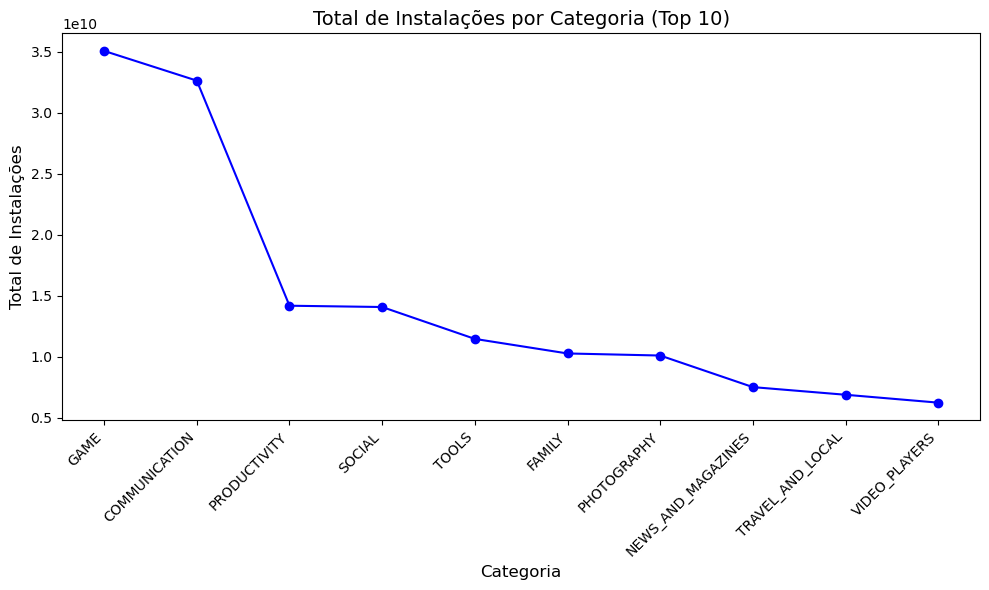

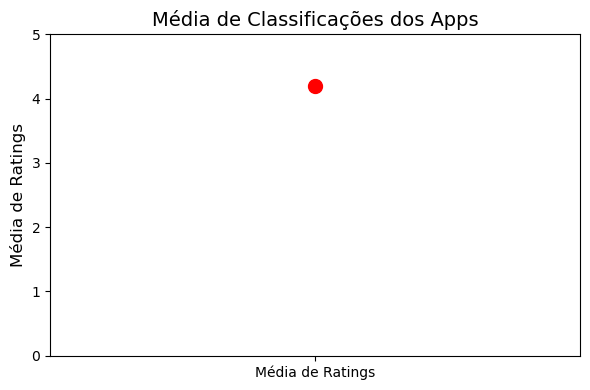

In [19]:


import matplotlib.pyplot as plt

# Gráfico 1: Gráfico de linha mostrando o total de instalações por categoria
plt.figure(figsize=(10,6))
plt.plot(category_installs.index, category_installs.values, marker='o', linestyle='-', color='b')
plt.title('Total de Instalações por Categoria (Top 10)', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Total de Instalações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Gráfico de dispersão da média de classificações (como ponto único)
plt.figure(figsize=(6,4))
plt.scatter(['Média de Ratings'], [media_ratings], color='r', s=100)
plt.title('Média de Classificações dos Apps', fontsize=14)
plt.ylabel('Média de Ratings', fontsize=12)
plt.ylim(0, 5)  # Escala de 0 a 5, que é o máximo de classificações
plt.tight_layout()
plt.show()
